In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json

## Data

In [3]:
PATH = Path('data/carvana')
MASKS_FN = 'train_masks.csv'
META_FN = 'metadata.csv'
masks_csv = pd.read_csv(PATH/MASKS_FN)
meta_csv = pd.read_csv(PATH/META_FN)

In [4]:
def show_img(im, figsize=None, ax=None, alpha=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, alpha=alpha)
    ax.set_axis_off()
    return ax

In [5]:
TRAIN_DN = 'train-128'
MASKS_DN = 'train_masks-128'
sz = 128
bs = 64
nw = 16

In [6]:
class MatchedFilesDataset(FilesDataset):
    def __init__(self, fnames, y, transform, path):
        self.y=y
        assert(len(fnames)==len(y))
        super().__init__(fnames, transform, path)
    def get_y(self, i): return open_image(os.path.join(self.path, self.y[i]))
    def get_c(self): return 0

In [7]:
x_names = np.array([Path(TRAIN_DN)/o for o in masks_csv['img']])
y_names = np.array([Path(MASKS_DN)/f'{o[:-4]}_mask.png' for o in masks_csv['img']])

In [8]:
val_idxs = list(range(1008))
((val_x,trn_x),(val_y,trn_y)) = split_by_idx(val_idxs, x_names, y_names)

In [9]:
aug_tfms = [RandomRotate(4, tfm_y=TfmType.PIXEL),
            RandomFlip(tfm_y=TfmType.PIXEL),
            RandomLighting(0.05, 0.05)]

In [11]:
tfms = tfms_from_model(resnet34, sz, crop_type=CropType.NO, tfm_y=TfmType.NO, aug_tfms=aug_tfms)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x[:10],trn_y[:10]), (val_x[:10],val_y[:10]), tfms, path=PATH)
md = ImageData(PATH, datasets, bs, num_workers=16, classes=None)
denorm = md.trn_ds.denorm

In [12]:
import fastai.dataloader

In [85]:
ltpe = fastai.dataloader.LazyThreadPoolExecutor()

In [86]:
# tpe = LazyThreadPoolExecutor()

In [87]:
md.resize(64, PATH/'test/resized')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [13]:
trn_dl_it = iter(md.trn_dl)

In [22]:
%timeit for x in iter(md.trn_dl): pass

Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking inste

Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking instead
Chunking inste

In [23]:
%timeit for x in trn_dl_it: pass

Chunking instead
37.4 ns ± 0.913 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### Trying new data loader

In [15]:
md2 = ImageData(PATH, datasets, bs, num_workers=16, classes=None)

In [16]:
trn_dl2 = md2.trn_dl

In [17]:
trn_dl2.lazy_loader = True

In [18]:
trn_dl2_it = iter(trn_dl2)

In [21]:
%timeit for x in iter(trn_dl2): pass

Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using la

Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using la

Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using la

Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
Using lazy threadpool- no batch
17.1 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%timeit for x in trn_dl2_it: pass

Using lazy threadpool- no batch
37.7 ns ± 0.386 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## Simple upsample

In [11]:
f = resnet34
cut,lr_cut = model_meta[f]

In [12]:
def get_base():
    layers = cut_model(f(True), cut)
    return nn.Sequential(*layers)

In [13]:
def mask_loss(pred,targ):
    return F.binary_cross_entropy_with_logits(pred[:,0],targ[...,0])

def mask_acc(pred,targ): return accuracy_multi(pred[:,0], targ[...,0], 0.5)

In [14]:
def dice(pred, targs):
    m1 = (pred[:,0]>0).float()
    m2 = targs[...,0]
    return 2. * (m1*m2).sum() / (m1+m2).sum()

In [15]:
class StdUpsample(nn.Module):
    def __init__(self, nin, nout):
        super().__init__()
        self.conv = nn.ConvTranspose2d(nin, nout, 2, stride=2)
        self.bn = nn.BatchNorm2d(nout)
        
    def forward(self, x): return self.bn(F.relu(self.conv(x)))

In [16]:
class Upsample34(nn.Module):
    def __init__(self, rn):
        super().__init__()
        self.rn = rn
        self.up1 = StdUpsample(512,256)
        self.up2 = StdUpsample(256,256)
        self.up3 = StdUpsample(256,256)
        self.up4 = StdUpsample(256,256)
        self.up5 = nn.ConvTranspose2d(256, 1, 2, stride=2)
        
    def forward(self,x):
        x = F.relu(self.rn(x))
        x = self.up1(x)
        x = self.up2(x)
        x = self.up3(x)        
        x = self.up4(x)
        x = self.up5(x)
        return x

In [17]:
m_base = get_base()

In [18]:
m_base

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

In [18]:
class UpsampleModel():
    def __init__(self,model,name='upsample'):
        self.model,self.name = model,name

    def get_layer_groups(self, precompute):
        lgs = list(split_by_idxs(children(self.model.rn), [lr_cut]))
        return lgs + [children(self.model)[1:]]

In [20]:
m = to_gpu(Upsample34(m_base))
models = UpsampleModel(m)

In [46]:
learn = ConvLearner(md, models)
learn.opt_fn=optim.Adam
learn.crit=mask_loss
learn.metrics=[mask_acc,dice]

In [47]:
learn.freeze_to(1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 86%|████████▌ | 55/64 [00:11<00:01,  4.71it/s, loss=2.69]     

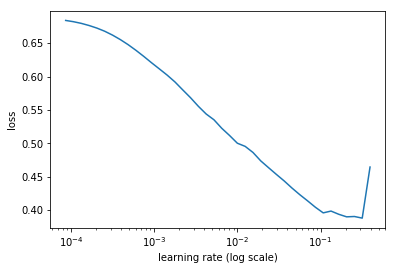

In [48]:
learn.lr_find()
learn.sched.plot()

In [18]:
lr=4e-2

In [50]:
learn.fit(lr,1,cycle_len=4,use_clr=(20,8))

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

 48%|████▊     | 31/64 [00:08<00:08,  3.87it/s, loss=0.195]

Exception in thread Thread-12:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   mask_acc   dice           
    0      0.10468    0.053746   0.976766   0.946428  
    1      0.056676   0.037985   0.983176   0.961703        
    2      0.040433   0.036181   0.986258   0.963986        
    3      0.032533   0.029013   0.987332   0.971693        



[0.029013293, 0.9873316697776318, 0.9716928716679694]

In [51]:
learn.save('tmp')

In [52]:
learn.load('tmp')

In [53]:
learn.unfreeze()
learn.bn_freeze(True)
lrs = np.array([lr/100,lr/10,lr])/2

In [54]:
learn.fit(lrs,1,cycle_len=4,use_clr=(20,8))

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   dice            
    0      0.027986   0.02791    0.987853   0.972623  
    1      0.026095   0.025905   0.989134   0.974987        
    2      0.024183   0.024827   0.989715   0.97614         
    3      0.022674   0.023912   0.990234   0.977251        



[0.023912037, 0.9902342148125172, 0.9772508550883112]

In [55]:
learn.save('128')

## U-net (ish)

In [56]:
[o.features.size() for o in m.sfs]

AttributeError: 'Upsample34' object has no attribute 'sfs'

In [19]:
class SaveFeatures():
    features=None
    def __init__(self, m): self.hook = m.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output):
#         pdb.set_trace()
        self.features = output
    def remove(self): self.hook.remove()

In [20]:
class UnetBlock(nn.Module):
    def __init__(self, up_in, x_in, n_out):
        super().__init__()
        up_out = x_out = n_out//2
        self.x_conv  = nn.Conv2d(x_in,  x_out,  1)
        self.tr_conv = nn.ConvTranspose2d(up_in, up_out, 2, stride=2)
        self.bn = nn.BatchNorm2d(n_out)
        
    def forward(self, up_p, x_p):
        up_p = self.tr_conv(up_p)
        x_p = self.x_conv(x_p)
        cat_p = torch.cat([up_p,x_p], dim=1)
        return self.bn(F.relu(cat_p))

In [21]:
class Unet34(nn.Module):
    def __init__(self, rn):
        super().__init__()
        self.rn = rn
        self.sfs = [SaveFeatures(rn[i]) for i in [2,4,5,6]]
        self.up1 = UnetBlock(512,256,256)
        self.up2 = UnetBlock(256,128,256)
        self.up3 = UnetBlock(256,64,256)
        self.up4 = UnetBlock(256,64,256)
        self.up5 = UnetBlock(256,64,256)
        self.up6  = nn.Conv2d(256,1,1)
        self.x_skip = nn.Sequential(
            nn.Conv2d(3,64,1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        
    def forward(self,x):
        x_input = x
        x_skip = self.x_skip(x_input)
        x = F.relu(self.rn(x))
        x = self.up1(x, self.sfs[3].features)
        x = self.up2(x, self.sfs[2].features)
        x = self.up3(x, self.sfs[1].features)
        x = self.up4(x, self.sfs[0].features)
        x = self.up5(x, x_skip)
        x = self.up6(x)
        return x

In [22]:
m_base = get_base()
m = to_gpu(Unet34(m_base))
models = UpsampleModel(m)

In [23]:
m

Unet34(
  (rn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pa

In [24]:
learn = ConvLearner(md, models)
learn.opt_fn=optim.Adam
learn.crit=mask_loss
learn.metrics=[mask_acc,dice]

In [50]:
learn.freeze_to(1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 89%|████████▉ | 57/64 [00:17<00:02,  3.21it/s, loss=1.59] 

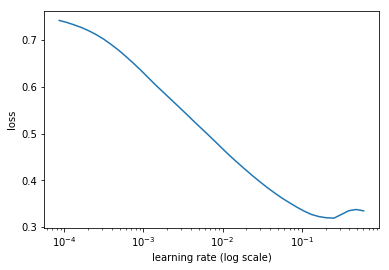

In [51]:
learn.lr_find()
learn.sched.plot()

In [25]:
lr=4e-2

In [26]:
learn.fit(lr,1,cycle_len=8,use_clr=(20,8))

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   dice            
    0      0.064692   0.039262   0.985964   0.964238  
    1      0.036393   0.02568    0.989556   0.975803        
    2      0.026931   0.023305   0.990196   0.978063        
    3      0.023432   0.022783   0.990377   0.978733        
    4      0.021797   0.021687   0.991637   0.979777        
    5      0.020757   0.020986   0.992195   0.980544        
    6      0.019293   0.019377   0.992117   0.982004        
    7      0.018407   0.019017   0.9926     0.982423        



[0.019017436, 0.9925998263061047, 0.9824233977022722]

In [28]:
learn.save('128urn-xrblock-tmp')

In [29]:
learn.load('128urn-xrblock-tmp')

In [ ]:
learn.lr_find()
learn.sched.plot()

In [ ]:
lr=1e-3

In [30]:
learn.unfreeze()
learn.bn_freeze(True)
lrs = np.array([lr/100,lr/10,lr])

In [31]:
learn.fit(lrs,1,cycle_len=40,use_clr=(20,10))

HBox(children=(IntProgress(value=0, description='Epoch', max=40), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   dice            
    0      0.020787   0.018369   0.992393   0.982856  
    1      0.019764   0.01799    0.992471   0.983123        
    2      0.021163   0.493888   0.821824   0.344646        
    3      40.726054  1.184134   0.800399   0.059006       
    4      11.463556  0.391348   0.862363   0.576072      
    5      3.423854   0.381247   0.856357   0.581776      
    6      1.217106   0.379563   0.865117   0.589644      
    7      0.606364   0.378012   0.863082   0.59427        
    8      0.43625    0.369244   0.865148   0.604186       
    9      0.3907     0.370075   0.864737   0.623798       
    10     0.388189   0.388279   0.862228   0.578523       
 59%|█████▉    | 38/64 [00:15<00:10,  2.50it/s, loss=0.391]

KeyboardInterrupt: 

In [32]:
learn.save('128urn-xrblock-0')

In [ ]:
learn.load('128urn-xrblock-0')

In [ ]:
x,y = next(iter(md.val_dl))
py = to_np(learn.model(V(x)))

In [ ]:
# ax = show_img(denorm(x)[0])
show_img(py[0][0]>0);

In [ ]:
# ax = show_img(denorm(x)[0])
show_img(y[0,...,-1]);

## 512x512

In [33]:
TRAIN_DN = 'train-512'
MASKS_DN = 'train_masks-512'
sz = 512
bs = 8

In [34]:
x_names = np.array([Path(TRAIN_DN)/o for o in masks_csv['img']])
y_names = np.array([Path(MASKS_DN)/f'{o[:-4]}_mask.png' for o in masks_csv['img']])

In [35]:
val_idxs = list(range(1008))
((val_x,trn_x),(val_y,trn_y)) = split_by_idx(val_idxs, x_names, y_names)

In [36]:
tfms = tfms_from_model(vgg16, sz, crop_type=CropType.NO, tfm_y=TfmType.NO, aug_tfms=aug_tfms)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH)
md = ImageData(PATH, datasets, bs, num_workers=4, classes=None)
denorm = md.trn_ds.denorm

In [37]:
m_base = get_base()
m = to_gpu(Unet34(m_base))
models = UpsampleModel(m)

In [38]:
learn = ConvLearner(md, models)
learn.opt_fn=optim.Adam
learn.crit=mask_loss
learn.metrics=[mask_acc,dice]

learn.freeze_to(1)

In [39]:
learn.load('128urn-xrblock-0')

In [40]:
lr=4e-2

In [42]:
learn.fit(lr,1,cycle_len=5,use_clr=(20,5))

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

  8%|▊         | 43/510 [00:29<05:18,  1.46it/s, loss=0.0372]

KeyboardInterrupt: 

In [43]:
learn.save('512urn-xrblock-tmp')

In [44]:
learn.load('512urn-xrblock-tmp')

In [45]:
# lr=1e-3
lr=4e-2

In [46]:
learn.unfreeze()
learn.bn_freeze(True)
lrs = np.array([lr/100,lr/10,lr])

In [47]:
learn.fit(lrs,1,cycle_len=8,use_clr=(20,8))

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

  0%|          | 0/510 [00:00<?, ?it/s]                      

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCStorage.cu:58

In [ ]:
learn.save('512urn-xrblock')

In [29]:
learn.load('512urn-xrblock')

FileNotFoundError: [Errno 2] No such file or directory: 'data/carvana/models/512urn-xrblock.h5'

In [ ]:
x,y = next(iter(md.val_dl))
py = to_np(learn.model(V(x)))

In [ ]:
show_img(py[0][0]>0);

In [ ]:
show_img(y[0,...,-1]);

## 1024x1024

In [ ]:
sz=1024
bs=4

In [ ]:
tfms = tfms_from_model(resnet34, sz, crop_type=CropType.NO, tfm_y=TfmType.PIXEL, aug_tfms=aug_tfms)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH)
md = ImageData(PATH, datasets, bs, num_workers=4, classes=None)
denorm = md.trn_ds.denorm

In [ ]:
m_base = get_base()
m = to_gpu(Unet34(m_base))
models = UpsampleModel(m)

In [ ]:
learn = ConvLearner(md, models)
learn.opt_fn=optim.Adam
learn.crit=mask_loss
learn.metrics=[mask_acc,dice]

learn.freeze_to(1)

In [ ]:
learn.load('512urn')

In [ ]:
learn.fit(lr,1,cycle_len=2,use_clr=(20,4))

In [ ]:
learn.save('1024urn-tmp')

In [ ]:
learn.unfreeze()
learn.bn_freeze(True)

In [ ]:
learn.fit(lrs/2,1,cycle_len=4,use_clr=(20,8))

In [ ]:
learn.save('1024urn')

In [ ]:
learn.load('1024urn')

In [ ]:
x,y = next(iter(md.val_dl))
py = to_np(learn.model(V(x)))

In [ ]:
show_img(py[0][0]>0);

In [ ]:
show_img(y[0,...,-1]);